In [169]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io  import loadmat

In [166]:
data = loadmat('ex4data1.mat')
X = np.hstack([np.ones([5000,1]), data['X']])
#X.shape
y=data['y']
y.shape

(5000, 1)

In [167]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))
sigmoid(0)

0.5

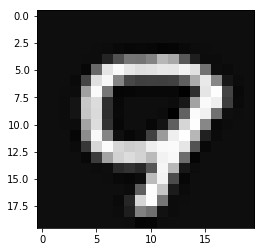

In [168]:
def showOne(x):
    img = x.reshape([20,20]).T
    plt.imshow(img, cmap='gray')
    plt.show()
showOne(data['X'][4999])

In [8]:
def onehot(y):
    y = np.where(y==10,0,y) # replace 10 with 0
    y_oh = np.zeros([5000,10])
    y_oh[np.arange(5000), y] = 1
    return y_oh
y_oh = onehot(y.reshape(-1))

In [178]:
y_oh[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
#X : 5000*401
def fp(theta1, theta2,X):
    #theta1 : 25*401
    # X.T   : 401 * 5000
    # a2    : 5000 *25
    a2 = sigmoid(theta1.dot(X.T)).T
    
    #theta2 : 10*26
    # a2    : 5000 * 25
    # a2A   : 5000 * 26
    a2A = np.hstack([np.ones([5000,1 ]), a2])
    print ("a2A --->", a2A.shape)
    
    # a3    : 5000 * 10
    a3 = sigmoid (a2A.dot(theta2.T))
    
    return a2,a3
    

In [145]:
#X : 1*401
def fp1(theta1, theta2,X):
    #theta1 : 25*401
    # X.T   : 401 * 1
    # a2    : 1 *25
    X = X.reshape([401,-1])
    #print('[FP] X.shape',X.shape)
    a2 = sigmoid(theta1.dot(X))
    
    #theta2 : 10*26
    # a2    : 25 * 1
    # a2A   : 26 * 1
    a2A = np.vstack([1,a2])
    # a2A   : 1 * 26
    a2A = a2A.T
    #print ("[FP] a2A --->", a2A.shape)
    
    # a3    : 1 * 10   {(1*26) . (26*10)}
    a3 = sigmoid (a2A.dot(theta2.T))
    
    #print('[FP] a3.shape', a3.shape)
    return a2A,a3
    

# Cost Function:
<img width = '400' src = "https://work.alibaba-inc.com/aliwork_tfs/g01_alibaba-inc_com/tfscom/TB1.r_RagMPMeJjy1XbXXcwxVXa.tfsprivate.png"/>

In [185]:
tt = np.random.random(size=100)
np.max((tt-0.5)*0.25), np.min((tt-0.5)*0.25)

(0.12353488424625858, -0.11960435707341235)

In [186]:
0.5*0.25

0.125

In [ ]:
input_size = 400  
hidden_size = 25  
num_labels = 10  
learning_rate = 1

params = (np.random.random(size=hidden_size * (input_size + 1) + num_labels * (hidden_size + 1)) - 0.5) * 0.25

In [18]:
#without for loop
def cost2(theta,X , y):
    theta1 = theta[0:10025].reshape([25,401])     #10025 (401*25)
    theta2 = theta[10025:10285].reshape([10,26])  #260   ( 10*26)
    a2,a3 = fp(theta1, theta2, X)
    
    print('-----------------------------------------------------------------')
    print('a3.shape---->',a3.shape)
    print('y_oh.shape-->',y_oh.shape)
    e1 = np.sum(y_oh * ( np.log(a3) ), axis=1)
    
    e2 = np.sum((1-y_oh) * ( np.log(1-a3) ), axis=1)
    print(e2.shape)
    errs = 0

    #a3 : [5000,10]
    #h  : [5000,10]
    #y  : [5000,10]

    errs =errs + np.sum(e1) + np.sum(e2)

    regulTerm =  1/2 * 1/5000 * np.sum(np.square(theta))
    return (1/5000) * errs + regulTerm

In [173]:
cs = cost2(initTheta,X , y)
print('-----------------------------------------------------------------')
print(cs)

a2A ---> (5000, 26)
-----------------------------------------------------------------
a3.shape----> (5000, 10)
y_oh.shape--> (5000, 10)
(5000,)
-----------------------------------------------------------------
-6.931471805599455


<img width="400" src="http://7xrrje.com1.z0.glb.clouddn.com/screenshot_156.png"/>

In [174]:
randomTheta = np.random.uniform(-0.5,0.5,(10285))
print (randomTheta.shape)

(10285,)


In [175]:
# theta: 10285
# X    : 401    only 1 image here
# y    :  10    only 1 image here
def bp(theta, X,y):
    theta1 = theta[0:10025].reshape([25,401])     #10025 (401*25)
    theta2 = theta[10025:10285].reshape([10,26])  #260   ( 10*26)
    a2,a3 = fp1(theta1, theta2, X)  
    #print('[bp] a2-------------->',a2.shape)
    delta3 = (a3 - y).T   # [10, 1]
    #print('[bp] delta3---------->',delta3.shape)
    d2 = theta2.T.dot(delta3) # [26*10] . [10*1]
    g2 = (a2 * (1-a2)).T  # todo : ???
    delta2 = d2 * g2 # 26
    delta2 = np.delete(delta2, 0).reshape([25,1])    #25 abandon error of bias unit...
    #print(d2.shape)
    #print(g2.shape)
    #print('[bp] delta2---------->',delta2.shape)
    
    
    #STEP E
    Delt2 = delta3.dot(a2)  #[10*1] . [1*26] = (10, 26)
    #print('[bp] Delt2---------->',Delt2.shape)
    Delt1 = delta2.dot(X.reshape([-1,401])) #[25*1] . [1*401] =(25, 401)
    #print('[bp] Delt1---------->',Delt1.shape) 
    return Delt1, Delt2
    

In [176]:
print('a' + '\t' + 'b')

a	b


In [177]:
ta = np.array([1,2,3,4]).reshape([2,2])
tb = np.array([5,6,7,8]).reshape([2,2])

np.append(ta.flatten(), tb.flatten())

array([1, 2, 3, 4, 5, 6, 7, 8])

In [164]:
# theta: 10285
# X    : 5000* 401    only 1 image here
# y    : 5000* 10     only 1 image here
def BP(theta, X, y, reg):
    theta1 = theta[0:10025].reshape([25,401])     #10025 (401*25)
    theta2 = theta[10025:10285].reshape([10,26])  #260   ( 10*26)
    
    Del1 = np.zeros([25, 401])
    Del2 = np.zeros([10, 26])
    
    for i in range(X.shape[0]):
        Delta1, Delta2 = bp(theta, X[i],y[i])
        
        Del1 = Del1 + Delta1 
        Del2 = Del2 + Delta2 
        #print('[BP] Shapes------> ',Delta1.shape,'\t', Del1.shape)
    
    print('Del1 shape' ,  Del1.shape)
    
    D1 = (1/5000) * Del1 + reg*theta1 #todo: remove reg terms for bias weights... (Theta1/1,0) <-------- 0
    D2 = (1/5000) * Del2 + reg*theta2
    
    allD = np.append(D1.flatten(), D2.flatten())
    return allD

allD = BP(randomTheta,X,y_oh,0.1)
print(allD)
print(allD.shape)

Del1 shape (25, 401)
[-0.02342613  0.00189451  0.00449026 ...  0.08786058  0.05639899
  0.07036772]
(10285,)


In [124]:
bp(randomTheta, X[0],y_oh[0])

X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)


In [73]:
# test matrix * multiply
ar1 = np.array([[1,2],[3,4]])
ar2 = np.array([[1,2],[3,4]])
ar = ar1*(ar2)
print(ar)
np.sum(ar)

[[ 1  4]
 [ 9 16]]


30

30

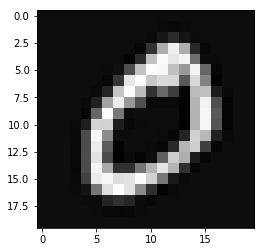

array([10], dtype=uint8)

In [64]:

x00 = data['X'][0].reshape([20,20]).T
plt.imshow(x00, cmap='gray')
plt.show()
y[0]

In [65]:
hiddensize = 25
samples = 5000
features = 400
outputClass =10

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
#hx: 5000*10
#Oy: 5000*10
#theta1: 25*401
#theta2: 10*26

def cost(theta, hX,Oy):
    errs = 0
    for i in range(5000):
        y = Oy(i) #10 hori Vec
        x = hX(i) #10 hori Vec
        vx = x.reshape(-1,1)
        e1 = -y.dot(np.log(vx))
        e2 = -(1-y).dot(np.log(1-vx))
        err = e1+e2
        errs+=err
        
        thetaAllSquare = np.square(theta)
        
        regTerms = (1/5000)*lamda * ()
    return (1/5000)*errs 

In [20]:
# FP for single sample
def ForwardPropagation(theta, X1):
    #theta1: 25*401
    theta1 = theta[:25*401].reshape([25,401])
    #theta2: 10*26
    theta2 = theta[25*401:].reshape([10,26])
    
    #X1: [401,]
    a1 = X1
    
    #z1: [25,1]
    z2 = theta1.dot(a1)
    a2 = sigmoid(z2).reshape([-1,1])
    
    
    #appending a20
    print('a2.shape--->', a2.shape)
    a2 = np.vstack([1, a2])
    
    
    z3 = theta2.dot(a2)
    a2 = sigmoid(a1).reshape([-1,1])
    print('a2.shape--->', a2.shape)
    return a2,a1 # 10*1

In [10]:
# BP for one sample
def BackPropagation(theta,X1,y):
    #theta1: 25*401
    theta1 = theta[:25*401].reshape([25,401])
    #theta2: 10*26
    theta2 = theta[25*401:].reshape([10,26])
    #X: [401,]
    a0 = X1
    
    hx,a1 = ForwardPropagation(theta, X1) [10,1]
    delta3 =  hx - y
    
    gPrime2 = a1 * (1-a1)
    delta2 = theta2.T.dot(delta2).reshape([-1,1]) * gPrime2
    
    return delta2,delta3


def gradient():
    D1 = delta2.dot(a1.T)
    D2 = delta3.dot(a2.T)
    

array([[3.],
       [4.],
       [5.],
       [6.]])

In [28]:
aaa = np.array([1,2,3,4,5]).reshape([-1,1])
bbb = np.array([1,2,3,4,5]).reshape([-1,1])
xxx = aaa*bbb
xxx * (1-xxx)

array([[   0],
       [ -12],
       [ -72],
       [-240],
       [-600]])

In [26]:
initTheta = np.zeros([10285])
X1 = X[0]
hx = ForwardPropagation(initTheta, X1)
hx

a1.shape---> (25, 1)
a2.shape---> (26, 1)


array([[0.73105858],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933]])

In [12]:
X[0].shape

(401,)

In [ ]:
# FP for all samples
# X [5000, 401]
def ForwardPropagationAll(theta, X):
    #theta1: 25*401
    theta1 = theta[:25*401].reshape([25,401])
    #theta2: 10*26
    theta2 = theta[25*401:].reshape([10,26])
    #X: [5000,401]
    a0 = X
    #theta1: 25*401
    #z1: [5000,25]
    z1 = theta1.T.dot(X)
    a1 = sigmoid(z1)
    #appending a10
    a1 = np.hstack([np.ones([5000,1]), a1])
    #a1: [5000, 26]
    # theta2: 10*26
    #z2: [5000,10]
    z2 = theta2.T.dot(a1)
    a2 = sigmoid(a1)
    return a2 # [5000,10]